In [1]:
import pandas as pd
import numpy as np

class DBSCAN():
    def __init__(self, eps, MinPts):
        """Init DBSCAN class
        :parameter D: dataset
        :parameter eps: threshold distance
        :parameter MinPts: Minimum required number of neighbours
        """
        self.labels = None
        self.D = None
        self.eps = eps
        self.MinPts = MinPts
    
    def fit(self, D):
        """Fitting with dataset
        :parameter D: dataset
        rtype: list
        """
        self.labels = [None for i in range(len(D))] 
        self.D = D
        # Init cluster id from 0
        C = 0
        for P in range(0, len(D)):
            # labels[P] not None, which already clustered
            if not (self.labels[P] == None): continue
            # return P's NeighborPts
            NeighborPts = self.regionQuery(P, self.eps)
            if len(NeighborPts) < self.MinPts:
                self.labels[P] = -1
            else:
                C += 1
                # Use P to new cluster and expand it
                self.expandCluster(P, NeighborPts, C, self.eps, self.MinPts)
        return self.labels
    
    def expandCluster(self, P, NeighborPts, C, eps, MinPts):
        """expand cluster with P
        rtype: None
        """
        # Add P to cluster C
        self.labels[P] = C
        # For loop all the NeighborPts of P 
        for Pn in NeighborPts:
            if self.labels[Pn] == None:
                self.labels[Pn] = C
                # return Pn's NeighborPts
                PnNeighborPts = self.regionQuery(Pn, eps)
                if len(PnNeighborPts) >= MinPts:
                    NeighborPts += PnNeighborPts

            if self.labels[Pn] == -1:
                self.labels[Pn] = C
    
    def regionQuery(self, P, eps):
        P_neighbors = list()
        for Pn in range(len(self.D)):
            # If distance with the threshold, add to neighbours list
            if np.linalg.norm(self.D[P] - self.D[Pn]) <= eps:
                P_neighbors.append(Pn)
        return P_neighbors

In [2]:
def load_data(file_name):
    """Load data as pandas dataframe
    """
    data = pd.read_csv(file_name, delimiter='\t', header=-1)
    # Split columns
    x = data.iloc[:, 2:]
    y = data[1]
    return x, y

In [3]:
def caculate_jaccard_matrix(cluster):
    matrixs = [[0 for i in range(len(cluster))] for i in range(len(cluster))]
    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if cluster[i] == cluster[j]:
                matrixs[i][j] = 1
    return matrixs

In [4]:
def perform_jaccard_coefficient(truth, cluster):
    """caculate the rand and jaccard index
    :parameter truth: ground truth labels, cluster: the labels from our algorithm
    rtype: rand index(float), jaccard (float)
    """
    same, diff, both_zero = 0, 0, 0
    for idx_x, row in enumerate(truth):
        for idx_y, value in enumerate(row):
            if truth[idx_x][idx_y] == 1 and truth[idx_x][idx_y] == cluster[idx_x][idx_y]:
                same += 1
            elif truth[idx_x][idx_y] != cluster[idx_x][idx_y]:
                diff += 1
            else:
                both_zero += 1
    return (same + both_zero) * 1.0 / (same + both_zero + diff), (same) * 1.0 / (same + diff)

# 1. iyer.txt

In [53]:
# iyer.txt
x, y = load_data('iyer.txt')
x = np.array(x).astype(np.float)
cluster_labels = DBSCAN(eps=1, MinPts=2).fit(x)

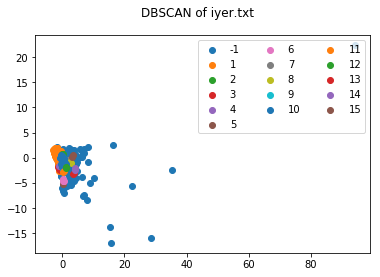

In [78]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data_pca = PCA(n_components=2).fit_transform(x)
fig, ax = plt.subplots()
fig.suptitle('DBSCAN of iyer.txt')
for group in np.unique(cluster_labels):
    idx = np.where(cluster_labels == group)
    ax.scatter(data_pca[:, 0][idx], data_pca[:, 1][idx], label = group)
ax.legend(loc=1, ncol=3)
plt.show()

In [26]:
# Validate clustering results with external index 
cluster_matrixs = caculate_jaccard_matrix(cluster_labels)
ground_truth = caculate_jaccard_matrix(y.tolist())
res = perform_jaccard_coefficient(ground_truth, cluster_matrixs)
print "Rand index: " + str(res[0]) + " Jaccard Coefficient: " + str(res[1])

Rand index: 0.668598408464 Jaccard Coefficient: 0.288462619788


# 2. cho.txt

In [80]:
# cho.txt
x, y = load_data('cho.txt')
x = np.array(x).astype(np.float)
cluster_labels = DBSCAN(eps=1, MinPts=2).fit(x)

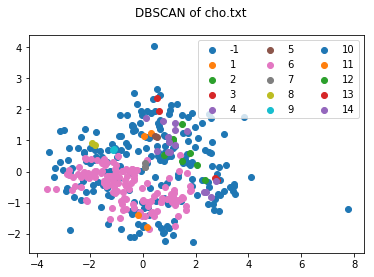

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data_pca = PCA(n_components=2).fit_transform(x)
fig, ax = plt.subplots()
fig.suptitle('DBSCAN of cho.txt')
for group in np.unique(cluster_labels):
    idx = np.where(cluster_labels == group)
    ax.scatter(data_pca[:, 0][idx], data_pca[:, 1][idx], label = group)
ax.legend(loc=1, ncol=3)
plt.show()

In [44]:
# Validate clustering results with external index 
cluster_matrixs = caculate_jaccard_matrix(cluster_labels)
ground_truth = caculate_jaccard_matrix(y.tolist())
res = perform_jaccard_coefficient(ground_truth, cluster_matrixs)
print "Rand index: " + str(res[0]) + " Jaccard Coefficient: " + str(res[1])

Rand index: 0.568968294451 Jaccard Coefficient: 0.19818717539
